In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kneed as kn
import plotly.graph_objects as go
import random

In [2]:
from plotly.subplots import make_subplots

#scaling, normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#kmeans, dbscan, hierarchical (sklearn)
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
#evaluation
from sklearn.metrics import silhouette_score

#distance matrix (dbscan elbow, hierarchical)
from scipy.spatial.distance import pdist, squareform
from scipy.stats import pearsonr

# hierarchical (scipy)
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

from kneed import KneeLocator

In [3]:
from sklearn.metrics import *
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

In [4]:
from pyclustering.cluster import xmeans

In [18]:
df = pd.read_csv('train_log_unscaled.csv')

In [19]:
del df['originalTitle']
del df['rating']
del df['titleType']
del df['countryOfOrigin']
del df['genres']
del df['isAdult']
del df['isRatable']
del df['canHaveEpisodes']
del df['runtimeMinutes']
del df['numVotes']
del df['totalVideos']
del df['totalCredits']
del df['nominations']
del df['totalImages']

In [20]:
X=df.values
scaler=MinMaxScaler()
X= scaler.fit_transform(X)

In [21]:
xm = xmeans.xmeans(X)
xm.process()

In [22]:
clusters = xm.get_clusters()

In [23]:
def clusters_to_labels(clusters):
    labels = np.empty(shape=(len(np.concatenate(clusters))), dtype=int)
    for i in range(len(clusters)):
        for idx in clusters[i]:
            labels[idx] = i
    return labels

In [24]:
labels = clusters_to_labels(clusters)

In [25]:
centers = np.array(xm.get_centers())
#la variabile è stata indicata nelle prime righe di codice
centers_unscaled = scaler.inverse_transform(centers)

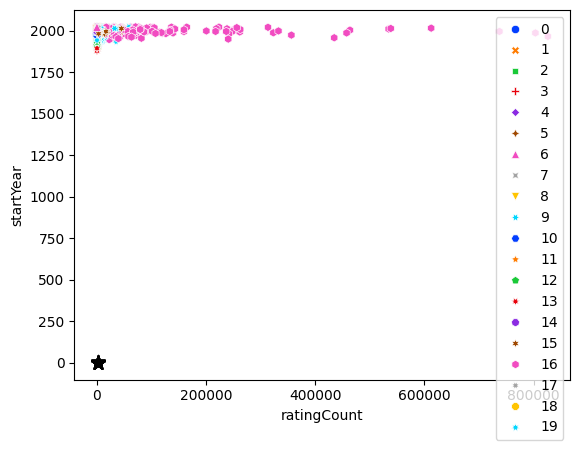

In [26]:
sns.scatterplot(data=df, x="ratingCount", y="startYear", hue=labels, palette="bright", style=labels)
plt.scatter(centers_unscaled[:, 0], centers_unscaled[:,4], color="black", marker="*", s=100)